In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/python_churnanalysis_project/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype(float)


In [ ]:
df.isnull().sum().sum()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df['customerID'].duplicated().sum()

np.int64(0)

Covert 0 and 1 values of senior citizen to Yes or No to make it easier to understand

In [ ]:
def conv(value):
 if value==1:
  return "yess"
 else:
  return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

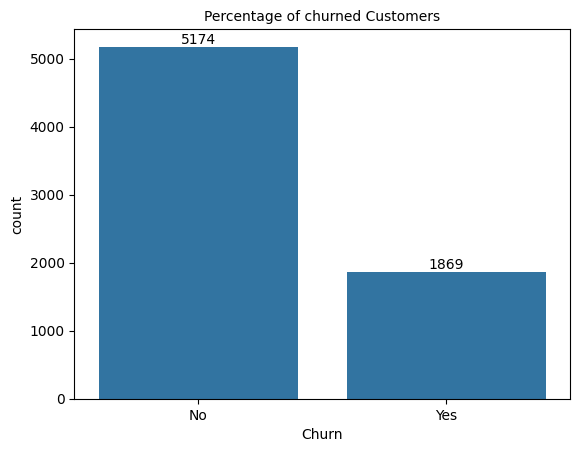

In [ ]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Percentage of churned Customers",fontsize=10)
plt.show()

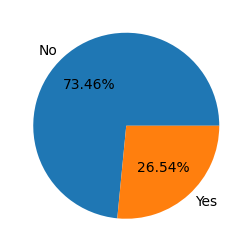

In [ ]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()

From the given customers 26.54% of our customers have churned out

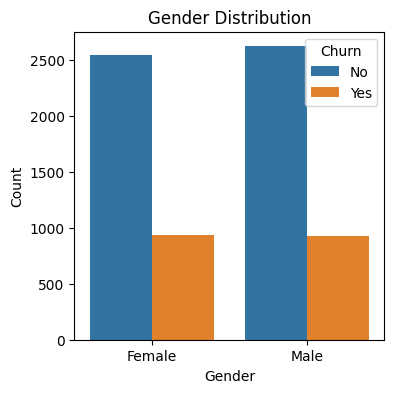

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

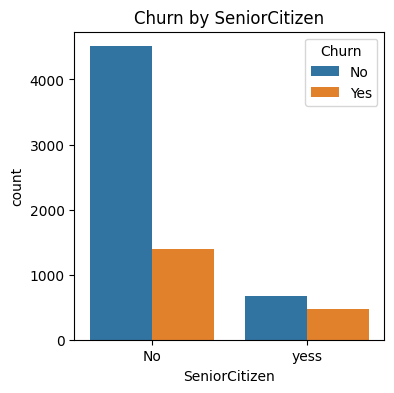

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

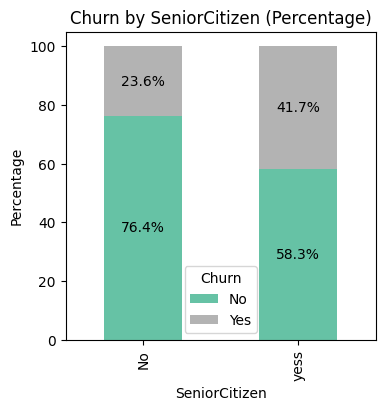

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab (counts of SeniorCitizen vs Churn)
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Convert counts to percentages
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_pct.plot(kind="bar", stacked=True, figsize=(4,4), colormap="Set2")

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()


Comparitively a greater percentage of people have churned out

<Axes: xlabel='tenure', ylabel='Count'>

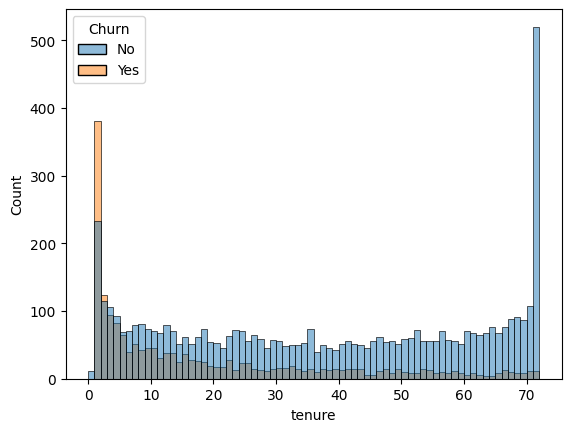

In [ ]:
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")

People who have used our services for long have stayed ,other wgo have used them for 1 or2 months have churned out

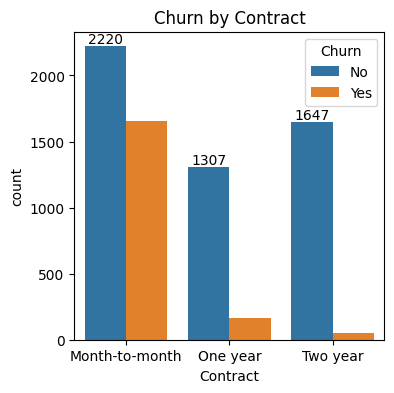

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

People who have monthto month contracts are like to churn than those who have 1 or 2 years of contract

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

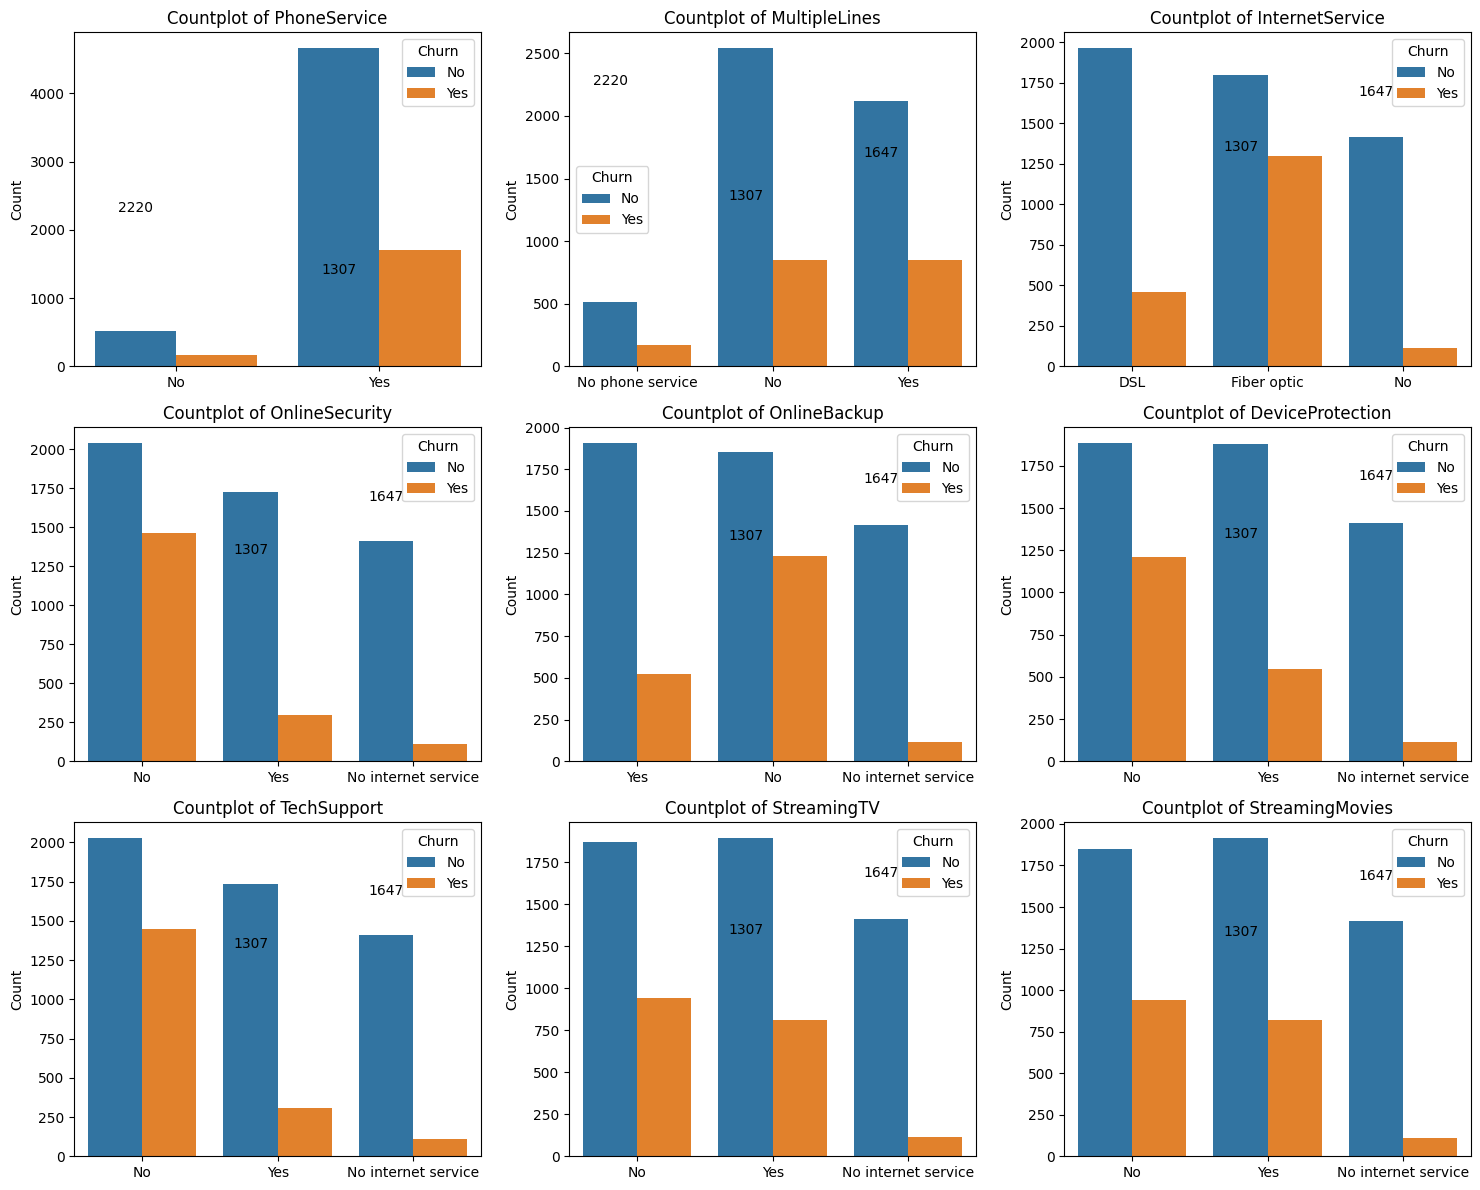

In [ ]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set number of rows & columns for subplots (3x3 since you have 9 features)
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through columns and create countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i],hue="Churn")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")  # remove x-labels to reduce clutter
    axes[i].set_ylabel("Count")
    axes[i].bar_label(ax.containers[0])

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

plt.show()


The dataset records customer information along with churn status. It includes demographics (like gender, senior citizen), account details (tenure, contract type, payment method), and service subscriptions (phone, internet, streaming, security, backup, etc.). Most customers have internet and phone services, but many do not subscribe to additional protections or support. Churn is noticeably higher among fiber-optic users and customers without add-on security or support services.

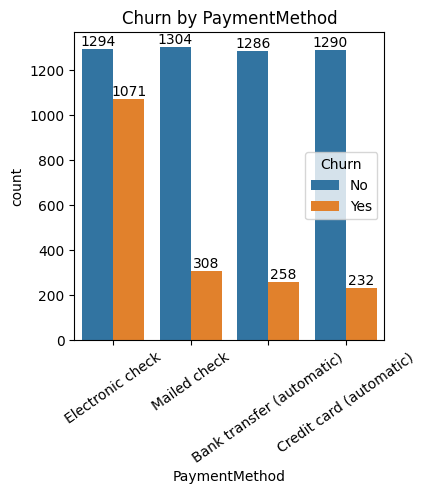

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=35)
plt.title("Churn by PaymentMethod")
plt.show()